# Business Objective:

#####- Inappropriate emails would demotivates and spoil the positive environment that would lead to more attrition rate and  low productivity and Inappropriate emails could be on form of bullying,racism,sexual favoritism and hate in the gender or culture,in today's world so dominated by email no organization is immune to these hate emails.

### -The goal of the project is to identify such emails in the given day based on the above inappropriate content


# Importing laibrary's

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\yashv\Downloads\emails1 (1).csv",index_col=0)
df

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


## Basic EDA

In [3]:
df.describe(include=object)

,filename,Message-ID,content,Class
count,48076,48076,48076,48076
unique,48076,48076,24656,2
top,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,Ken Lay and Jeff Skilling were interviewed on ...,Non Abusive
freq,1,1,19,44666


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
df.isna().sum()

filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [6]:
df.shape

(48076, 4)

In [7]:
df['Class'] = df['Class'].astype('category')


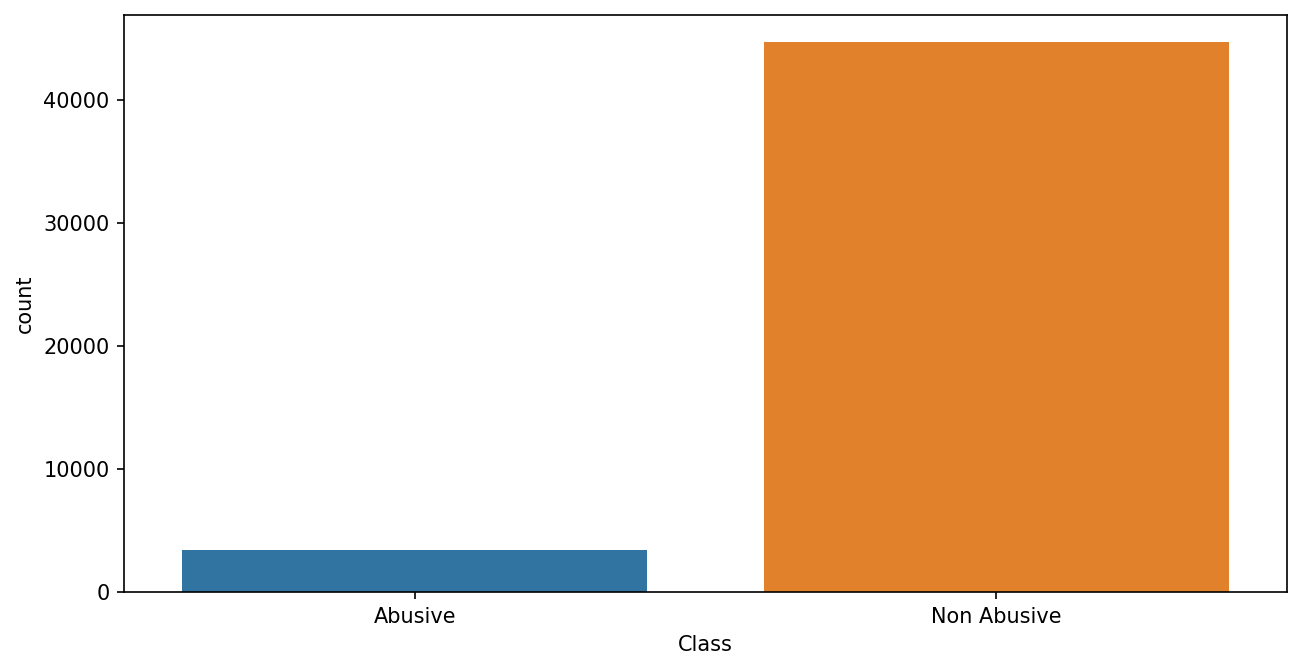

In [8]:
sns.countplot(data=df, x='Class')
sns.set_style='darkgrid'
plt.show()

## Feature Extraction

In [9]:
df.head(5)

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [10]:
df.drop(columns=['filename','Message-ID'],inplace=True)

In [11]:
df.head(5)

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [12]:
df.duplicated().sum()

23420

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(24656, 2)

 here we have drop the the [filename & Message ]column because they was not important for classification task 

In [15]:
df['lenght'] = df['content'].apply(len)

In [16]:
df

,content,Class,lenght
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220
1,fuck you,Abusive,8
2,Gentlemen:\nThe following champagne is availab...,Abusive,612
3,sorry i've taken so long...just been trying to...,Abusive,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203
...,...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive,1523
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive,1126
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive,892
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive,932


## Visualization

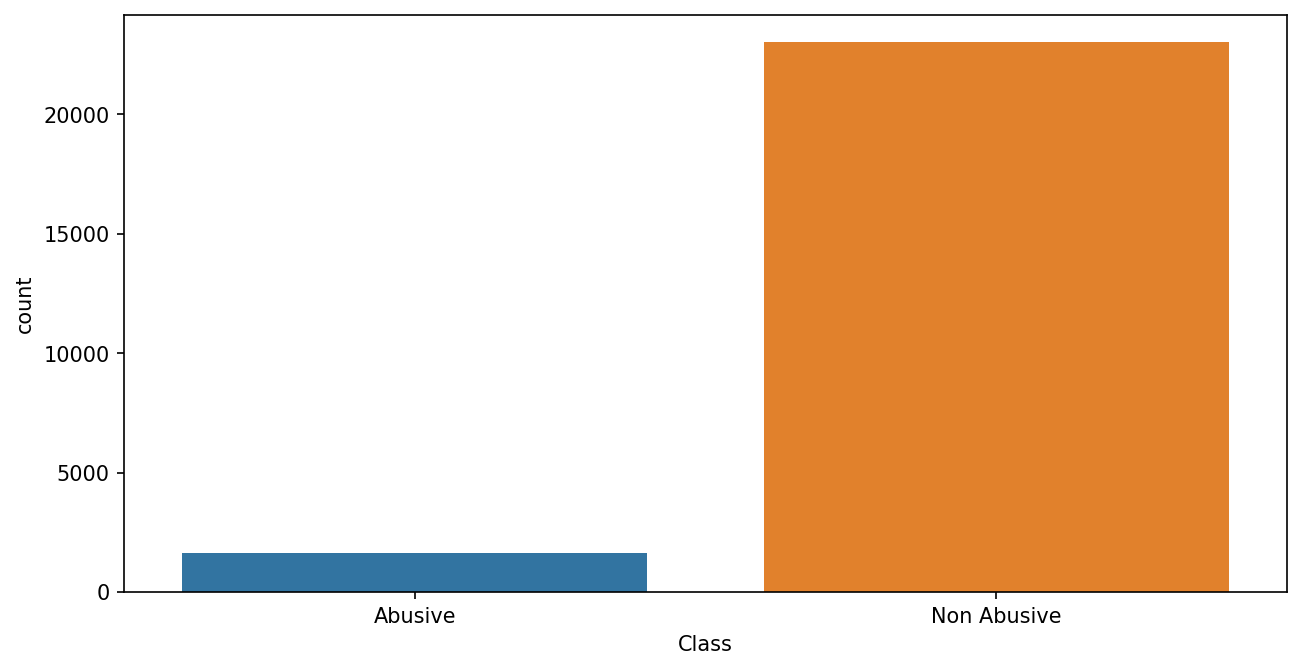

In [17]:
sns.countplot(data=df, x='Class',)
sns.set_style='darkgrid'
plt.show()


In [18]:
df['lable'] = df['Class'].map({'Abusive':1,'Non Abusive':0})

In [19]:
df

,content,Class,lenght,lable
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220,1
1,fuck you,Abusive,8,1
2,Gentlemen:\nThe following champagne is availab...,Abusive,612,1
3,sorry i've taken so long...just been trying to...,Abusive,505,1
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203,1
...,...,...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive,1523,0
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive,1126,0
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive,892,0
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive,932,0


array([<Axes: title={'center': 'Abusive'}>,
       <Axes: title={'center': 'Non Abusive'}>], dtype=object)

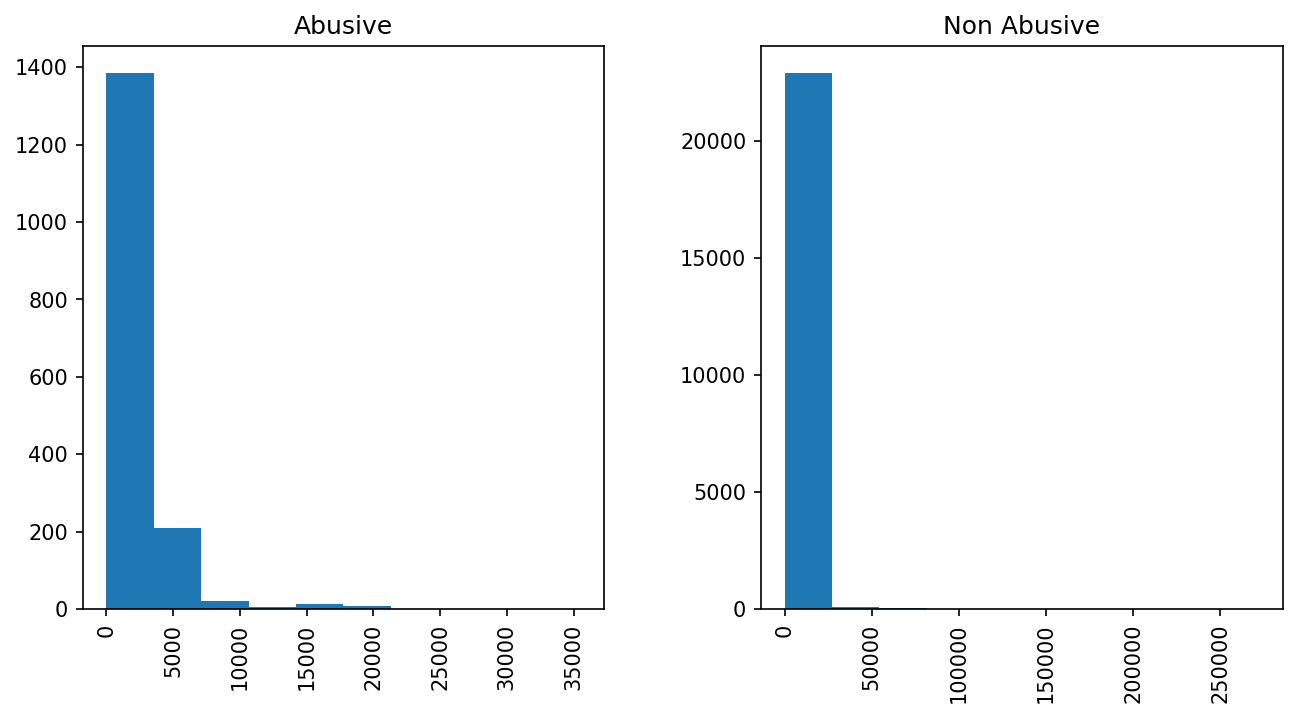

In [20]:
df.hist(column='lenght',by='Class')

### Text Cleaning


In [21]:
import string

In [22]:
def txt_cleaner(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[0-9' ']+',' ',text)
    text=re.sub('[''""…]', ' ', text)
    text=re.sub('[\n]', ' ', text)
    text=re.sub('[\s]', ' ', text)
    text=text.lower()
    return text
clean = lambda x : txt_cleaner(x)


In [23]:
df['content'] = df['content'].apply(clean)
df.content

0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr            ...
                               ...                        
47974     do you need new leads for your business    do...
47975     image     image       image  garth brooks   w...
47977      image  image  image   dear smartreminders me...
47980      image     image     image      image  kid ro...
47981     you received this e mail because you register...
Name: content, Length: 24656, dtype: object

### Rmoving Stopword

In [24]:
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [25]:
abusive = df[df['Class']=='Abusive']
non_abusive = df[df['Class']== 'Non Abusive']

In [26]:
abusive

,content,Class,lenght,lable
0,eat shit john j lavorato excelr pm john arnold...,Abusive,220,1
1,fuck,Abusive,8,1
2,gentlemen following champagne available approx...,Abusive,612,1
3,sorry taken long trying fend chicks life soooo...,Abusive,505,1
4,asshole john j lavorato excelr john arnold hou...,Abusive,203,1
...,...,...,...,...
3403,arkansas joke guy driving rural road arkansas ...,Abusive,259,1
3404,john thanks note yeah things look pretty lousy...,Abusive,419,1
3405,lot confused bullshit floating around,Abusive,57,1
3406,wow three weeks away kids brave lucky man life...,Abusive,270,1


In [27]:
non_abusive

,content,Class,lenght,lable
3410,forecast,Non Abusive,23,0
3411,traveling business meeting takes fun trip espe...,Non Abusive,786,0
3412,test successful way go,Non Abusive,30,0
3413,randy send schedule salary level everyone sche...,Non Abusive,187,0
3414,let shoot tuesday,Non Abusive,35,0
...,...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1523,0
47975,image image image garth brooks wrapped image i...,Non Abusive,1126,0
47977,image image image dear smartreminders member i...,Non Abusive,892,0
47980,image image image image kid rock forever image...,Non Abusive,932,0


In [28]:
df.content

0        eat shit john j lavorato excelr pm john arnold...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john j lavorato excelr john arnold hou...
                               ...                        
47974    need new leads business need increased interne...
47975    image image image garth brooks wrapped image i...
47977    image image image dear smartreminders member i...
47980    image image image image kid rock forever image...
47981    received e mail registered e trade web site on...
Name: content, Length: 24656, dtype: object

In [29]:
df

,content,Class,lenght,lable
0,eat shit john j lavorato excelr pm john arnold...,Abusive,220,1
1,fuck,Abusive,8,1
2,gentlemen following champagne available approx...,Abusive,612,1
3,sorry taken long trying fend chicks life soooo...,Abusive,505,1
4,asshole john j lavorato excelr john arnold hou...,Abusive,203,1
...,...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1523,0
47975,image image image garth brooks wrapped image i...,Non Abusive,1126,0
47977,image image image dear smartreminders member i...,Non Abusive,892,0
47980,image image image image kid rock forever image...,Non Abusive,932,0


 ## WordCloud

In [30]:
def wordcl(data,heading):
    txt = ' '.join(data['content'])
    wc = WordCloud(background_color='black',width=700,height=700).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

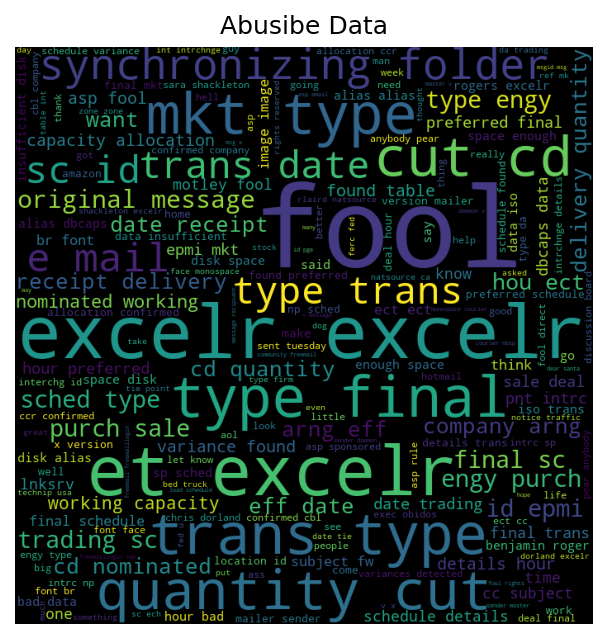

In [31]:
wordcl(abusive,'Abusibe Data')

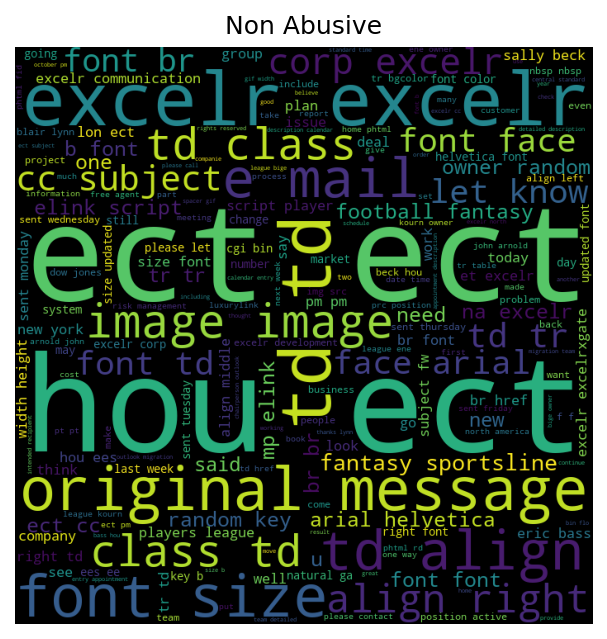

In [32]:
wordcl(non_abusive,'Non Abusive')

In [33]:
df

,content,Class,lenght,lable
0,eat shit john j lavorato excelr pm john arnold...,Abusive,220,1
1,fuck,Abusive,8,1
2,gentlemen following champagne available approx...,Abusive,612,1
3,sorry taken long trying fend chicks life soooo...,Abusive,505,1
4,asshole john j lavorato excelr john arnold hou...,Abusive,203,1
...,...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1523,0
47975,image image image garth brooks wrapped image i...,Non Abusive,1126,0
47977,image image image dear smartreminders member i...,Non Abusive,892,0
47980,image image image image kid rock forever image...,Non Abusive,932,0


In [34]:
abusive

,content,Class,lenght,lable
0,eat shit john j lavorato excelr pm john arnold...,Abusive,220,1
1,fuck,Abusive,8,1
2,gentlemen following champagne available approx...,Abusive,612,1
3,sorry taken long trying fend chicks life soooo...,Abusive,505,1
4,asshole john j lavorato excelr john arnold hou...,Abusive,203,1
...,...,...,...,...
3403,arkansas joke guy driving rural road arkansas ...,Abusive,259,1
3404,john thanks note yeah things look pretty lousy...,Abusive,419,1
3405,lot confused bullshit floating around,Abusive,57,1
3406,wow three weeks away kids brave lucky man life...,Abusive,270,1


In [35]:
non_abusive

,content,Class,lenght,lable
3410,forecast,Non Abusive,23,0
3411,traveling business meeting takes fun trip espe...,Non Abusive,786,0
3412,test successful way go,Non Abusive,30,0
3413,randy send schedule salary level everyone sche...,Non Abusive,187,0
3414,let shoot tuesday,Non Abusive,35,0
...,...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1523,0
47975,image image image garth brooks wrapped image i...,Non Abusive,1126,0
47977,image image image dear smartreminders member i...,Non Abusive,892,0
47980,image image image image kid rock forever image...,Non Abusive,932,0


# Resampling

In [36]:
df_sample = pd.read_csv(r"C:\Users\yashv\Downloads\emails1 (1).csv",index_col=0)
df_sample

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [37]:
df_sample.drop(columns=['filename','Message-ID'],inplace=True)
df_sample

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [38]:
df_sample.drop_duplicates(inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

df_sample['target_class']= le.fit_transform(df_sample['Class'])

# 0 = Abusive
# 1 = Non-Abusive

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



# Separate features (X) and target labels (y)
X = df_sample.drop('target_class', axis=1)  # Update with your target column name
y = df_sample['target_class']  # Update with your target column name

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Undersample the majority class
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Create new DataFrame with resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['target_column'] = y_resampled  # Update with your target column name

# Save the resampled DataFrame to a new CSV file
resampled_df.to_csv('resampled_data.csv', index=False)

Class distribution before undersampling: Counter({1: 23014, 0: 1642})
Class distribution after undersampling: Counter({0: 1642, 1: 1642})


In [43]:
resampled_df

,content,Class,target_column
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,0
1,fuck you,Abusive,0
2,Gentlemen:\nThe following champagne is availab...,Abusive,0
3,sorry i've taken so long...just been trying to...,Abusive,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,0
...,...,...,...
3279,Thanks for sending the dates in writing. We a...,Non Abusive,1
3280,-----Original Message-----\nFrom: Nolen Glaze ...,Non Abusive,1
3281,It looks an awful lot like snow.\n\n\n\n\n----...,Non Abusive,1
3282,"tx, rick\n\n-----Original Message-----\nFrom: ...",Non Abusive,1


In [44]:
import re
import string  

In [45]:
custom_stopwords = set(stopwords.words('english'))

def txt_cleaner(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub('[0-9]+', ' ', text)
    text = re.sub('[\'"“”…]', ' ', text)
    text = re.sub('[\n]', ' ', text)
    text = re.sub('[\s]+', ' ', text)  
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = ' '.join(y)

    y = []
    for i in text.split():
        if i not in custom_stopwords and i not in string.punctuation:
            y.append(i)

    return ' '.join(y)

In [46]:
resampled_df['content'] = resampled_df['content'].apply(lambda x: txt_cleaner(x))


In [47]:
resampled_df

,content,Class,target_column
0,eat shit john j lavorato excelr pm john arnold...,Abusive,0
1,fuck,Abusive,0
2,gentlemen following champagne available approx...,Abusive,0
3,sorry taken long trying fend chicks life soooo...,Abusive,0
4,asshole john j lavorato excelr john arnold hou...,Abusive,0
...,...,...,...
3279,thanks sending dates writing already home cale...,Non Abusive,1
3280,original message nolen glaze smtp nglaze oilst...,Non Abusive,1
3281,looks awful lot like snow original message eri...,Non Abusive,1
3282,tx rick original message gorny vladimir sent m...,Non Abusive,1


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

# Model Bulding

In [50]:
tfidf = TfidfVectorizer()

In [51]:
x = tfidf.fit_transform(resampled_df['content']).toarray()

In [52]:
y = resampled_df['target_column'].values

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [54]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier


In [55]:
svc = SVC(kernel='sigmoid',gamma=1.0)
lg = LogisticRegression()
mnb = MultinomialNB()

In [56]:
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))

0.9452054794520548
0.9583333333333334


In [57]:
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))

0.9406392694063926
0.9492063492063492


In [58]:
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))

0.9117199391171994
0.8837209302325582


In [59]:
import pickle

In [60]:
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))

In [61]:
import joblib

In [62]:
joblib.dump(tfidf,open('vectorj.pkl','wb'))
joblib.dump(svc,open('modelj.pkl','wb'))